### **Load the data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Global Superstore.txt to Global Superstore.txt


In [ ]:
df = pd.read_csv("Global Superstore.txt", sep="\t")
df.head()

,Category,City,Country,Customer ID,Customer Name,Discount,Market,记录数,Order Date,Order ID,...,Sales,Segment,Ship Date,Ship Mode,Shipping Cost,State,Sub-Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [ ]:
df.isna().sum()

,0
Category,0
City,0
Country,0
Customer ID,0
Customer Name,0
Discount,0
Market,0
记录数,0
Order Date,0
Order ID,0


There are zero missing values in the data

### **Data Structure**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer ID     51290 non-null  object 
 4   Customer Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order Date      51290 non-null  object 
 9   Order ID        51290 non-null  object 
 10  Order Priority  51290 non-null  object 
 11  Product ID      51290 non-null  object 
 12  Product Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row ID          51290 non-null  int64  
 17  Sales           51290 non-null 

Convert the column to datetime format:

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date']).dt.date
df['Ship Date'] = pd.to_datetime(df['Ship Date']).dt.date

Drop the irrelevant data for this analysis:

In [ ]:
df = df.drop(columns=['记录数', 'Row ID'], axis=1)

In [ ]:
df.head(10)

,Category,City,Country,Customer ID,Customer Name,Discount,Market,Order Date,Order ID,Order Priority,...,Sales,Segment,Ship Date,Ship Mode,Shipping Cost,State,Sub-Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,2011-01-07,CA-2011-130813,High,...,19,Consumer,2011-01-09,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,2011-01-21,CA-2011-148614,Medium,...,19,Consumer,2011-01-26,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05,CA-2011-118962,Medium,...,21,Consumer,2011-08-09,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05,CA-2011-118962,Medium,...,111,Consumer,2011-08-09,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,2011-09-29,CA-2011-146969,High,...,6,Consumer,2011-10-03,Standard Class,1.32,California,Paper,2011,North America,40
5,Office Supplies,Los Angeles,United States,JF-154904,Jeremy Farry,0.0,US,2011-10-19,CA-2011-117317,Critical,...,13,Consumer,2011-10-19,Same Day,2.39,California,Paper,2011,North America,43
6,Office Supplies,Los Angeles,United States,WB-218504,William Brown,0.0,US,2011-11-04,CA-2011-125829,Medium,...,19,Consumer,2011-11-11,Standard Class,1.15,California,Paper,2011,North America,45
7,Office Supplies,Los Angeles,United States,JA-159704,Joseph Airdo,0.0,US,2011-11-12,CA-2011-151295,High,...,12,Consumer,2011-11-16,Standard Class,0.92,California,Paper,2011,North America,46
8,Office Supplies,Los Angeles,United States,SP-209204,Susan Pistek,0.0,US,2011-11-22,CA-2011-135090,High,...,54,Consumer,2011-11-26,Standard Class,6.98,California,Paper,2011,North America,48
9,Office Supplies,Los Angeles,United States,RL-196154,Rob Lucas,0.0,US,2011-12-05,CA-2011-133830,Medium,...,49,Consumer,2011-12-10,Standard Class,1.99,California,Paper,2011,North America,50


Save the cleaned data:

In [ ]:
df.to_csv("global_superstore_cleaned_dataset.csv", sep=",", index=False, encoding="utf-8")

### **Descriptive Statistics**

In [ ]:
df.describe()

,Discount,Profit,Quantity,Sales,Shipping Cost,Year,weeknum
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,28.610982,3.476545,246.498440,26.375818,2012.777208,31.287112
std,0.212280,174.340972,2.278766,487.567175,57.296810,1.098931,14.429795
min,0.000000,-6599.978000,1.000000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,0.000000,2.000000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,9.240000,3.000000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,36.810000,5.000000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,8399.976000,14.000000,22638.000000,933.570000,2014.000000,53.000000


### **Correlation between numerical variables**

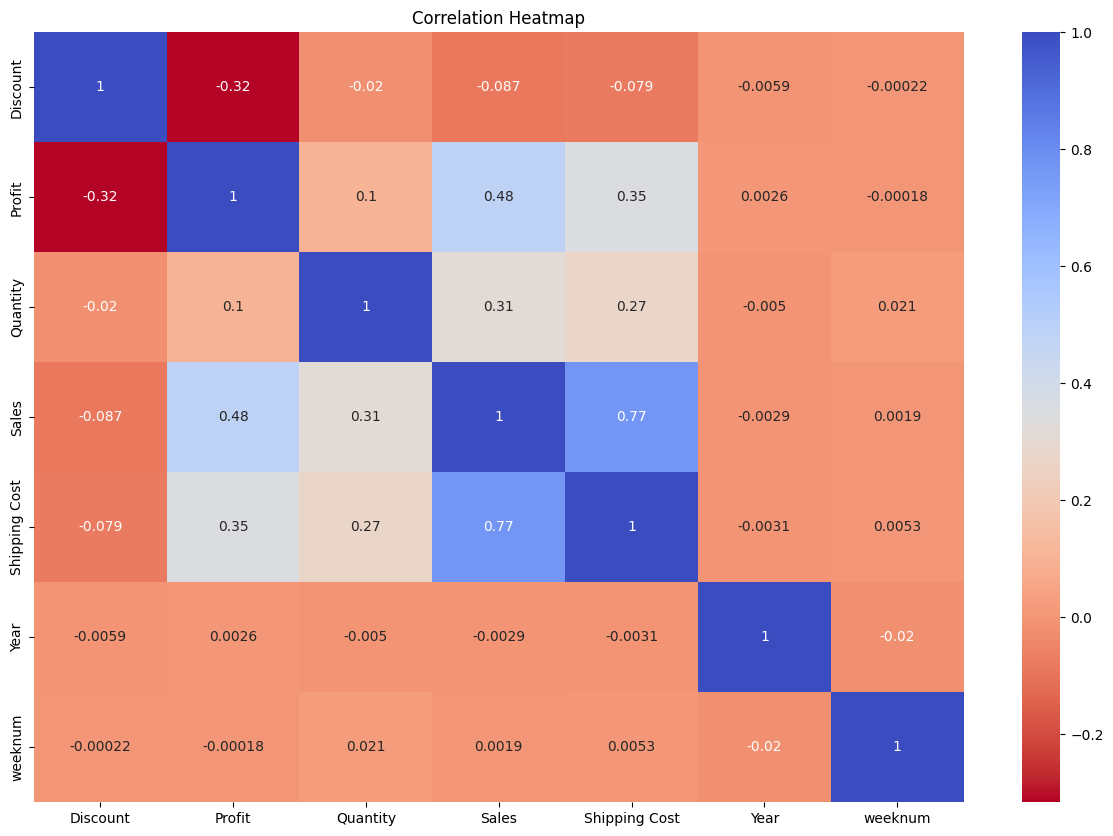

In [ ]:
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm_r')
plt.title('Correlation Heatmap')
plt.show()

Sales have more influence on profits than discounts. Shown by a stronger correlation at 0.48, compared to the discount which is at -0.35

### **Discount vs Profit**

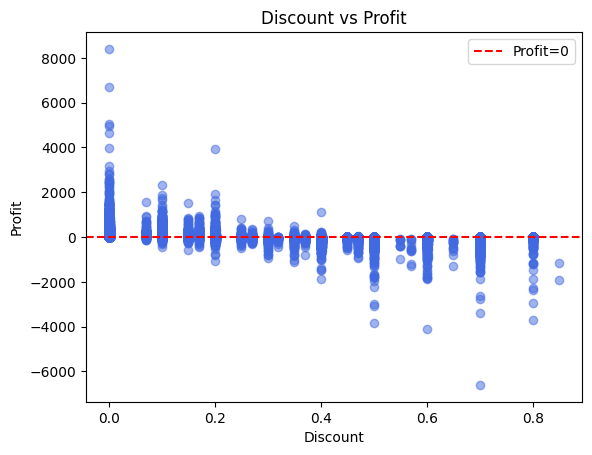

In [ ]:
plt.scatter(df['Discount'], df['Profit'], color= "royalblue", alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label='Profit=0')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend()
plt.show()

The higher the percentage given, the lower the profit generated, even to the point of loss or minus

### **Sales vs Profit per Category**

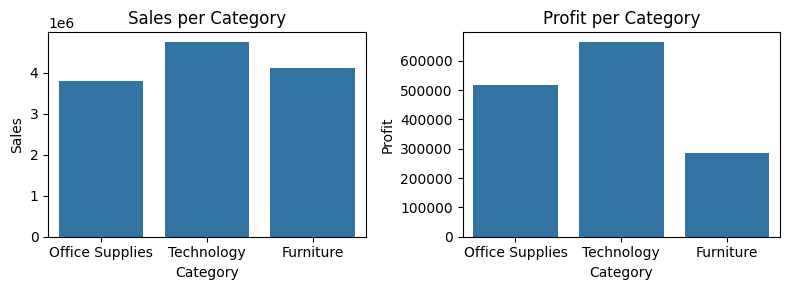

In [ ]:
value = ['Sales', 'Profit']

plt.figure(figsize=(8,3))
for i, column in enumerate(value, 1):
  plt.subplot(1, 2, i)
  sns.barplot(x=df['Category'], y=df[column], estimator=np.sum, errorbar=None)
  plt.xlabel('Category')
  plt.ylabel(column)
  plt.title(f'{column} per Category')

plt.tight_layout()
plt.show()

*   Office Supplies: medium sales, medium profit
*   Technology: high sales, high profit
*   Furniture: high sales, low profit



